In [199]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

In [200]:
def gradientEdges(Image,WhatUse,Return=False):
  Gx=[]
  Gy=[]
  match WhatUse:
    case "Robert":
      Gx=np.array([[1,0],[0,-1]])
      Gy=np.array([[0,1],[-1,0]])
    case "Prewitt":
      Gx=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
      Gy=np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    case "Sobel":
      Gx=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
      Gy=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
  # print(Gx,Gx.shape,type(Gx))
  Y_Img=cv.filter2D(Image,-1,Gy)
  X_Img=cv.filter2D(Image,-1,Gx)
  XY_Img=Y_Img+X_Img
  if Return:
    angle=np.zeros(XY_Img.shape)
    for i in range(XY_Img.shape[0]):
      for j in range(XY_Img.shape[1]):
        angle[i][j]=math.atan2(Y_Img[i][j],X_Img[i][j])
    return XY_Img,angle

  plt.subplot(3,2,1)
  plt.title("Ảnh gốc")
  plt.imshow(Image,cmap='gray')
  plt.subplot(3,2,2)
  plt.title("Ảnh toàn biên")
  plt.imshow(XY_Img,cmap='gray')
  plt.subplot(3,2,3)
  plt.title("Ảnh biên dọc")
  plt.imshow(X_Img,cmap='gray')
  plt.subplot(3,2,4)
  plt.title("Ảnh biến ngang")
  plt.imshow(Y_Img,cmap='gray')

  Enchant_Img=Image+XY_Img
  plt.subplot(3,2,5)
  plt.title("Ảnh làm nét")
  plt.imshow(Enchant_Img,cmap='gray')

In [201]:
img=cv.imread('puppy1.jpg',cv.IMREAD_GRAYSCALE)

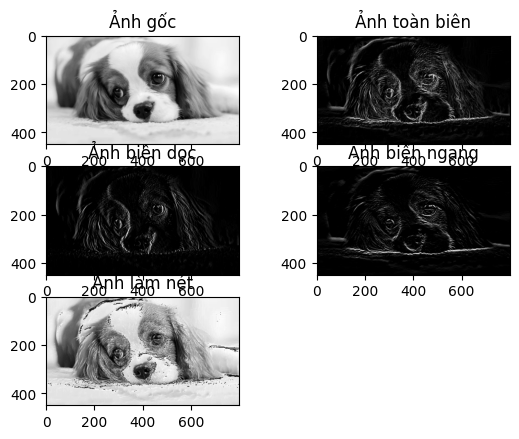

In [202]:
gradientEdges(img,"Sobel")

In [203]:
def laplacianEdges(Image,WhatUse):
  Mask=[]
  match WhatUse:
    case 1:
      Mask=np.array([[0,1,0],[1,-4,1],[0,1,0]])
    case 2:
      Mask=np.array([[1,1,1],[1,-8,1],[1,1,1]])
    case 3:
      Mask=np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
    case 4:
      Mask=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
  Sharp_Img=cv.filter2D(Image,-1,Mask)

  plt.subplot(2,2,1)
  plt.title("Ảnh gốc")
  plt.imshow(Image,cmap='gray')
  plt.subplot(2,2,2)
  plt.title("Ảnh biên")
  plt.imshow(Sharp_Img,cmap='gray')
  if Mask[1][1]>0:
    Enchant_Img=Sharp_Img+Image
  else:
    Enchant_Img=Image-Sharp_Img
  plt.subplot(2,2,3)
  plt.title("Ảnh làm nét")
  plt.imshow(Enchant_Img,cmap='gray')

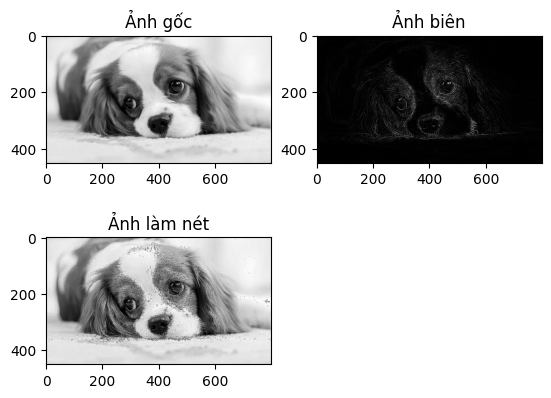

In [204]:
laplacianEdges(img,4)

In [222]:
def canny_edge_detection(Image):
  # Áp dụng Gaussian Blur để giảm nhiễu và làm mịn các cạnh
  blurred = cv.GaussianBlur(src=Image, ksize=(3, 5), sigmaX=0.5)

  # Thực hiện phát hiện cạnh Canny
  edges = cv.Canny(blurred, 70, 135)

  plt.figure(figsize = (16,4))
  plt.subplot(1,3,1)
  plt.title("Ảnh gốc")
  plt.imshow(Image,cmap='gray')
  plt.subplot(1,3,2)
  plt.title("Ảnh làm mờ")
  plt.imshow(blurred,cmap='gray')
  plt.subplot(1,3,3)
  plt.title("Ảnh cạnh Canny")
  plt.imshow(edges,cmap='gray')
  # return blurred, edges

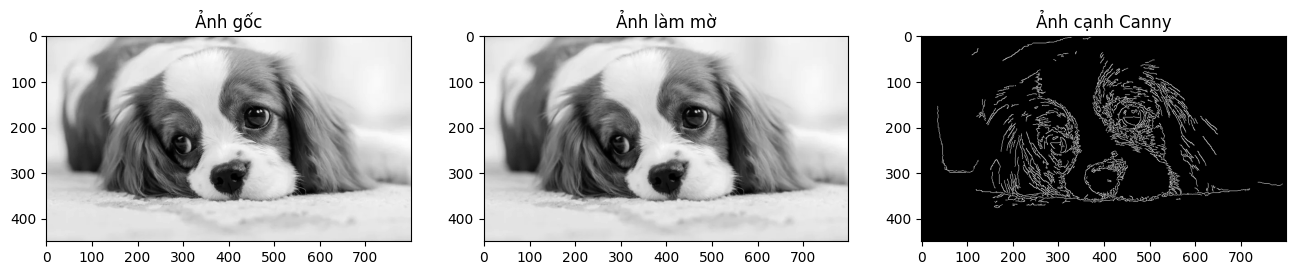

In [223]:
canny_edge_detection(img)

**Non-maximum suppression**

Nguyên tắc rất đơn giản: thuật toán đi qua tất cả các điểm trên ma trận cường độ gradient và tìm các pixel có giá trị lớn nhất theo các hướng cạnh.

*   Tạo một ma trận được khởi tạo bằng 0 có cùng kích thước của ma trận cường độ gradient ban đầu.
*   Xác định hướng của gradient dựa trên giá trị góc từ ma trận góc.
*   Kiểm tra xem pixel ở cùng một hướng có cường độ cao hơn pixel hiện đang được xử lý hay không.
*   Trả lại hình ảnh được xử lý bằng thuật toán non-maximum suppression.



In [207]:
def Non_maximum_suppression(img,D):
  X,Y=img.shape
  New=np.zeros((X,Y),dtype=np.int16)
  angle=D*180./np.pi
  angle[angle<0]+=180
  for i in range(1,X-1):
    for j in range(1,Y-1):
        q = 255 #Điểm 1
        r = 255 #Điểm 2
        #angle 0
        if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
            q = img[i, j+1]
            r = img[i, j-1]
        #angle 45
        elif (22.5 <= angle[i,j] < 67.5):
            q = img[i+1, j-1]
            r = img[i-1, j+1]
        #angle 90
        elif (67.5 <= angle[i,j] < 112.5):
            q = img[i+1, j]
            r = img[i-1, j]
        #angle 135
        elif (112.5 <= angle[i,j] < 157.5):
            q = img[i-1, j-1]
            r = img[i+1, j+1]

        if (img[i,j] >= q) and (img[i,j] >= r):
            New[i,j] = img[i,j]
        else:
            New[i,j] = 0
  return New

**Ngưỡng kép (Double threshold)**

Phân ngưỡng kép nếu lớn hơn ngưỡng thì là pixel mạnh, trong ngưỡng là pixel yếu, dưới ngưỡng không xét

In [215]:
def threshold2(img,k1,k2):
  X,Y=img.shape
  New=np.zeros((X,Y),dtype=np.int16)
  weak=25
  strong=255
  X_strong,Y_strong=np.where(img>=k2)
  X_weak,Y_weak=np.where((img>=k1)&(img<k2))
  New[X_strong,Y_strong]=strong
  New[X_weak,Y_weak]=weak
  return New,weak,strong

**Theo dõi cạnh theo độ trễ (Edge Tracking by Hysteresis)**

Nếu pixel có ngưỡng yếu và các pixel quanh là mạnh thì pixel đó mạnh và ngược lại

In [209]:
def Edge_Tracking_by_Hysteresis(img,weak,strong):
  X,Y=img.shape
  for i in range(1,X):
    for j in range(1,Y):
      if img[i][j]==weak:
        if img[i-1:i+2,j-1:j+2].max()==strong:
          img[i][j]=strong
  return img

In [210]:
img[0:3,0:3].max()

204

In [211]:
def Canny(img,k1,k2):
  Edges,angle=gradientEdges(img,"Sobel",1)
  img=Non_maximum_suppression(Edges,angle)
  img,w,s=threshold2(img,k1,k2)
  img=Edge_Tracking_by_Hysteresis(img,w,s)
  return img

In [220]:
def CannyEdges(Image):
  blurred = cv.GaussianBlur(src=Image, ksize=(3, 5), sigmaX=0.5)
  edges=Canny(blurred,70,135)
  plt.figure(figsize = (16,4))
  plt.subplot(1,3,1)
  plt.title("Ảnh gốc")
  plt.imshow(Image,cmap='gray')
  plt.subplot(1,3,2)
  plt.title("Ảnh làm mờ")
  plt.imshow(Image,cmap='gray')
  plt.subplot(1,3,3)
  plt.title("Ảnh cạnh Canny")
  plt.imshow(edges,cmap='gray')

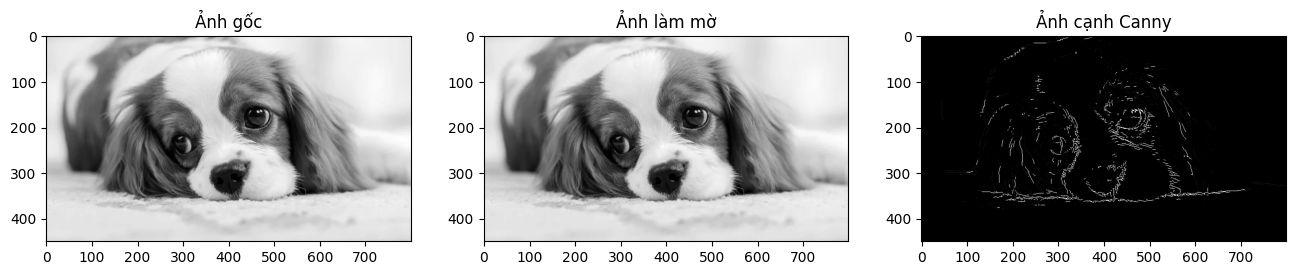

In [221]:
CannyEdges(img)

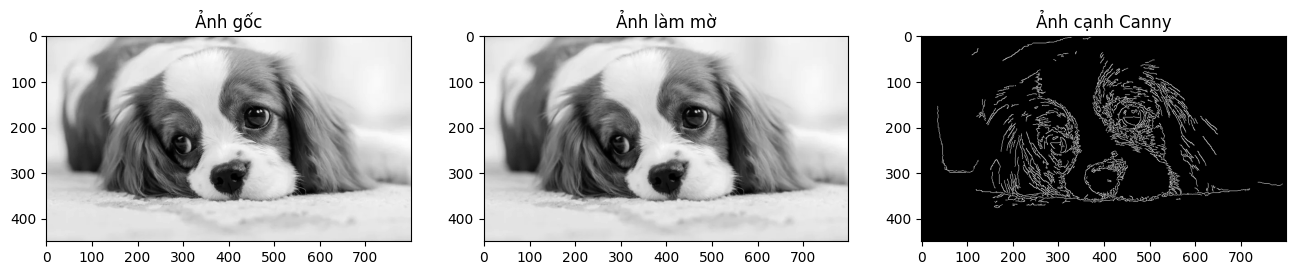

In [224]:
canny_edge_detection(img)

In [214]:
Edges,_=gradientEdges(img,"Sobel",1)

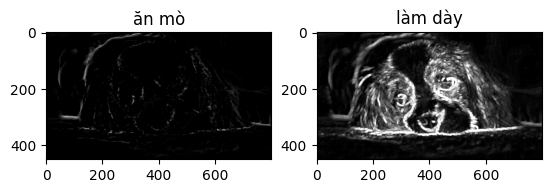

In [229]:
# Lấy ma trận cỡ 5
kernel = np.ones((5, 5), np.uint8)

# Tham số đầu tiên là ảnh gốc,
# kernel là ma trận chứa hình ảnh
# tham số tích chập và tham số thứ ba là số
# Số lần lặp lại, điều này sẽ xác định số lần lặp
# bạn muốn làm xói mòn/làm giãn một hình ảnh nhất định.
img_erosion = cv.erode(Edges, kernel, iterations=1)
img_dilation = cv.dilate(Edges, kernel, iterations=1)
plt.subplot(1,2,1)
plt.title("ăn mò")
plt.imshow(img_erosion,cmap='gray')
plt.subplot(1,2,2)
plt.title("làm dày")
plt.imshow(img_dilation,cmap='gray')

In [230]:
def opening(img,size,iteration):
  kernel = np.ones((size,size), np.uint8)
  img_erosion = cv.erode(img, kernel, iterations=iteration)
  img_dilation = cv.dilate(img_erosion, kernel, iterations=iteration)
  return img_dilation

def closing(img,size,iteration):
  kernel = np.ones((size,size), np.uint8)
  img_dilation = cv.dilate(img, kernel, iterations=iteration)
  img_erosion = cv.erode(img_dilation, kernel, iterations=iteration)
  return img_erosion

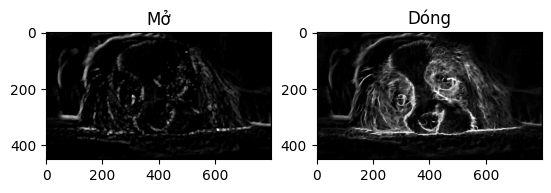

In [231]:
plt.subplot(1,2,1)
plt.title("Mở")
plt.imshow(opening(Edges,5,1),cmap='gray')
plt.subplot(1,2,2)
plt.title("Dóng")
plt.imshow(closing(Edges,5,1),cmap='gray')

In [232]:
img=cv.imread('puppy1.jpg')

In [263]:
def most_common_used_color(img):
    # Get width and height of Image
    width, height,_ = img.shape

    # Initialize Variable
    r_total = 0
    g_total = 0
    b_total = 0

    count = 0

    # Iterate through each pixel
    for x in range(0, width):
        for y in range(0, height):
            # r,g,b value of pixel
            r, g, b = img[0,0,0],img[0,0,1],img[0,0,2]

            r_total += r
            g_total += g
            b_total += b
            count += 1

    return (r_total/count, g_total/count, b_total/count)

In [264]:
# Chuyển sang không gian màu HSV, OCV đọc màu dưới dạng BGR
# khung được chuyển đổi thành hsv
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
most_common_used_color(hsv)

(26.0, 9.0, 205.0)

In [268]:

# xác định phạm vi che phủ
blue1 = np.array([16, 0, 195])
blue2 = np.array([86, 70, 275])

# khởi tạo mặt nạ
# phức tạp với hình ảnh đầu vào
mask = cv.inRange(hsv, blue1, blue2)

# chuyển bitwise_and thành
# mỗi pixel phức tạp
res = cv.bitwise_and(img, img, mask = mask)

# xác định kernel tức là metrix uint8
kernel = np.ones((5, 5), np.uint8)

# định nghĩa hàm mở
open = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)

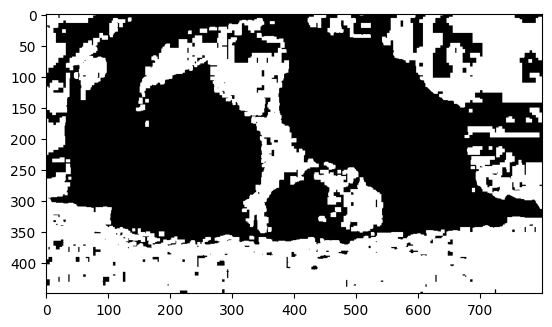

In [271]:
plt.imshow(open,cmap='gray')

**Hit-or-Miss**

Phép toán cho phép trả về kết quả chứa thông tin vị trí có cấu trúc giống với ma trận cấu trúc (Structuring Element)
Phép toàn cập lần lượt ma trận cần tìm vào ảnh(trong có ma trận cập sẽ mang các giá trị -1 0 1 với -1 phải bằng 0, 1 phải bằng 1 và 0 là gì cũng được)

In [341]:
def HitorMiss(img,matrix):
  # Lấy ra các vị trí mà matrix sẽ là 0
  # để lát các vị trí đó sẽ thay thế thành điểm
  # với matrix của img để so sánh
  l_x,l_y=np.where(matrix==0)
  # nhằm phù hợp với ảnh đa mức xám
  # thay thế điểm có -1 thành 0
  matrix[matrix==-1]=0
  # thay thế điểm có 1 thành 255
  matrix[matrix==1]=255

  x,y=img.shape
  # tạo matrix thứ 2 để dễ xử lý
  new=np.zeros((x,y),dtype=np.int16)

  # lập qua các vị trí pixel
  for i in range(1,x-1):
    for j in range(1,y-1):
      B=np.copy(matrix)
      # lấy ra matrix cần so sánh
      A=img[i-1:i+2,j-1:j+2]
      # thay thế điểm
      B[l_x,l_y]=A[l_x,l_y]

      # nếu tất cả điểm trong matrix giống nhau
      # sẽ giữ lại điểm đó
      if (A==B).all():
        new[i][j]=255
  return new

In [342]:
matrix=np.array([[0,-1,-1],[1,1,-1],[0,1,0]])

In [343]:
input_image = np.array((
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 255, 255, 255, 0, 0, 0, 255],
 [0, 255, 255, 255, 0, 0, 0, 0],
 [0, 255, 255, 255, 0, 255, 0, 0],
 [0, 0, 255, 0, 0, 0, 0, 0],
 [0, 0, 255, 0, 0, 255, 255, 0],
 [0,255, 0, 255, 0, 0, 255, 0],
 [0, 255, 255, 255, 0, 0, 0, 0]), dtype="uint8")

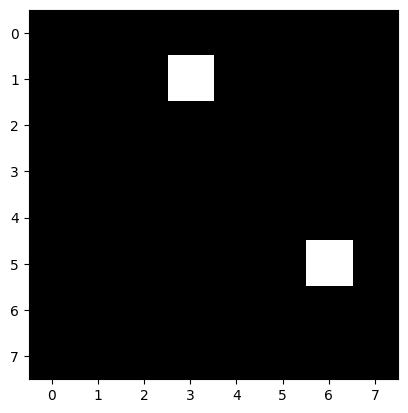

In [344]:
plt.imshow(HitorMiss(input_image,matrix),cmap='gray')

In [353]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# giảm nhiễu
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

# tạo vùng nền
sure_bg = cv.dilate(opening,kernel,iterations=3)

dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# vùng viền ảnh
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
# tạo nhãn
ret, markers = cv.connectedComponents(sure_fg)

# thay đổi các mark chỉ có 1, không có 0
markers = markers+1

# thay đổi mark 255 thành 0
markers[unknown==255] = 0

In [354]:
# áp dụng thuật toán watershed
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

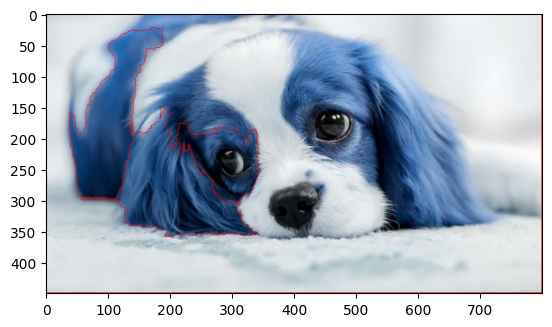

In [355]:
plt.imshow(img)